In [25]:
# we neeed to hyperparamter 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('model.csv')

In [29]:
df.head()

,Unnamed: 0,sim_content,sin_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,stop_word_ratio,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,is_mail,comment_duplication,classifier_val
0,0,0.372249,0.280355,3.057751,0.083333,3,6.612096,4.0,0,0.000000,8.750086,1.0,1,0,0,0,0.000000,1
1,1,0.354255,0.341604,2.410947,0.000000,1,4.897796,1.0,0,0.000000,15.380144,2.0,0,0,0,0,0.715092,0
2,2,0.487752,0.314966,1.578192,0.000000,1,3.791178,0.0,0,0.000000,14.181022,0.0,0,0,0,0,0.000000,0
3,3,0.468095,0.368193,2.328976,0.000000,1,5.041488,0.0,0,0.090909,13.636652,2.0,0,0,0,0,0.000000,0
4,4,0.366191,0.258061,2.238987,0.000000,1,5.174158,4.0,0,0.000000,13.529500,0.0,1,1,0,0,0.000000,0


In [30]:
df.rename(columns={'Unnamed: 0':'id'},inplace=True)
df.columns

Index(['id', 'sim_content', 'sin_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number', 'is_mail', 'comment_duplication', 'classifier_val'],
      dtype='object')

### Standardization

In [31]:
dfc = df.copy()

In [32]:
y = dfc['classifier_val']
X = dfc.drop(['classifier_val','id'],axis=1)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

### Handle imbalance dataset

In [35]:
dfc['classifier_val'].value_counts()

0    2540
1     585
Name: classifier_val, dtype: int64

In [36]:
from imblearn.combine import SMOTETomek
from collections import Counter

os=SMOTETomek(1)
X_train_os,y_train_os=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

X_train = X_train_os
y_train = y_train_os

C:\Users\Acer\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 1778, 1: 409})
The number of classes after fit Counter({1: 1760, 0: 1760})


In [37]:
X_train=np.asarray(X_train)
y_train = np.asarray(y_train)

In [12]:
# Importing the Keras libraries and packages
#import keras
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout



Using TensorFlow backend.


In [13]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'he_uniform',activation='relu',input_dim = 16))
classifier.add(Dropout(0.3))
# Adding the second hidden layer
classifier.add(Dense(units = 8,  kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.4))
# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
classifier.add(Dropout(0.2))


In [14]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [15]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.3, batch_size = 10, epochs = 100)

Train on 2468 samples, validate on 1058 samples
Epoch 1/100
2468/2468 [==============================] - 3s 1ms/sample - loss: 2.5438 - accuracy: 0.3606 - val_loss: 0.7199 - val_accuracy: 0.6106
Epoch 2/100
2468/2468 [==============================] - 1s 386us/sample - loss: 2.3516 - accuracy: 0.3594 - val_loss: 0.6894 - val_accuracy: 0.6078
Epoch 3/100
2468/2468 [==============================] - 1s 236us/sample - loss: 2.3154 - accuracy: 0.3598 - val_loss: 0.6772 - val_accuracy: 0.6040
Epoch 4/100
2468/2468 [==============================] - 1s 229us/sample - loss: 2.4047 - accuracy: 0.3521 - val_loss: 0.6569 - val_accuracy: 0.6040
Epoch 5/100
2468/2468 [==============================] - 1s 292us/sample - loss: 2.3666 - accuracy: 0.3675 - val_loss: 0.6397 - val_accuracy: 0.6030
Epoch 6/100
2468/2468 [==============================] - 1s 250us/sample - loss: 2.1739 - accuracy: 0.3707 - val_loss: 0.6232 - val_accuracy: 0.6115
Epoch 7/100
2468/2468 [==============================] - 1s 

2468/2468 [==============================] - 1s 236us/sample - loss: 1.3683 - accuracy: 0.7293 - val_loss: 1.0721 - val_accuracy: 0.3960
Epoch 56/100
2468/2468 [==============================] - 1s 211us/sample - loss: 1.3891 - accuracy: 0.7366 - val_loss: 1.0696 - val_accuracy: 0.3970
Epoch 57/100
2468/2468 [==============================] - 1s 238us/sample - loss: 1.4106 - accuracy: 0.7253 - val_loss: 1.0840 - val_accuracy: 0.3970
Epoch 58/100
2468/2468 [==============================] - 1s 259us/sample - loss: 1.2630 - accuracy: 0.7342 - val_loss: 1.0852 - val_accuracy: 0.3998
Epoch 59/100
2468/2468 [==============================] - 1s 253us/sample - loss: 1.3123 - accuracy: 0.7472 - val_loss: 1.0903 - val_accuracy: 0.4083
Epoch 60/100
2468/2468 [==============================] - 1s 262us/sample - loss: 1.2266 - accuracy: 0.7431 - val_loss: 1.0887 - val_accuracy: 0.4112
Epoch 61/100
2468/2468 [==============================] - 1s 233us/sample - loss: 1.3315 - accuracy: 0.7346 - val

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


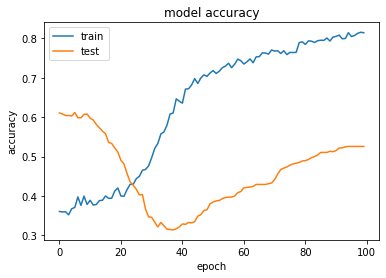

In [16]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

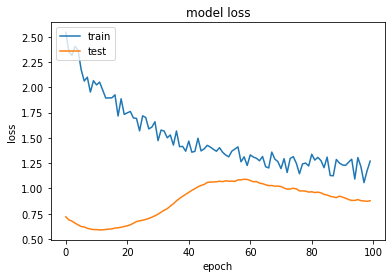

In [17]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [19]:
cm

array([[755,   7],
       [101,  75]], dtype=int64)

In [20]:
score

0.8848614072494669